In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Open", "High", "Low", "Close"]]


[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [4]:

# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)

In [5]:
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Open", "High", "Low", "Close"])


In [6]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [7]:
train_data

,Open,High,Low,Close
0,0.508982,0.441549,0.543815,0.491495
1,0.497006,0.433854,0.540997,0.513145
2,0.544411,0.479275,0.593970,0.563144
3,0.543912,0.504095,0.604114,0.552835
4,0.538423,0.489203,0.587489,0.576289
...,...,...,...,...
109,0.250250,0.171010,0.225416,0.220876
110,0.210080,0.131546,0.201465,0.190464
111,0.254491,0.230578,0.254156,0.272681
112,0.264471,0.241003,0.279515,0.308248


In [8]:
test_data

,Open,High,Low,Close
114,0.354291,0.280467,0.321499,0.301804
115,0.296906,0.211219,0.209073,0.194846
116,0.164421,0.081410,0.068188,0.119845
117,0.174651,0.087118,0.081713,0.076031
118,0.109780,0.056590,0.090166,0.094072
119,0.144711,0.094564,0.138630,0.142784
120,0.165419,0.082154,0.081431,0.084536
121,0.075100,0.045421,0.044801,0.108505
122,0.146208,0.076446,0.135249,0.125516
123,0.132236,0.070241,0.108481,0.100000


In [9]:
# Fit HWES model for each column
forecasts = {}
for column in ["Open", "High", "Low", "Close"]:
    model = ExponentialSmoothing(train_data[column], trend='add', seasonal=None, seasonal_periods=None).fit()
    forecasts[column] = model.forecast(steps=len(test_data))


In [11]:
# Convert forecasts to DataFrame
forecast_df = pd.DataFrame(forecasts, index=test_data.index)
forecast_df

,Open,High,Low,Close
114,0.319697,0.269279,0.333743,0.314946
115,0.318037,0.267771,0.331899,0.313398
116,0.316376,0.266264,0.330055,0.311849
117,0.314716,0.264756,0.328211,0.310300
118,0.313055,0.263248,0.326367,0.308752
119,0.311395,0.261741,0.324522,0.307203
120,0.309735,0.260233,0.322678,0.305654
121,0.308074,0.258726,0.320834,0.304106
122,0.306414,0.257218,0.318990,0.302557
123,0.304753,0.255710,0.317146,0.301008


In [12]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)

# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Open", "High", "Low", "Close"])
test_data_inv

,Open,High,Low,Close
0,719.000000,721.950012,705.049988,709.650024
1,707.500000,708.000000,685.099976,688.900024
2,680.950012,681.849976,660.099976,674.349976
3,683.000000,683.000000,662.500000,665.849976
4,670.000000,676.849976,664.000000,669.349976
5,677.000000,684.500000,672.599976,678.799988
6,681.150024,682.000000,662.450012,667.500000
7,663.049988,674.599976,655.950012,672.150024
8,677.299988,680.849976,672.000000,675.450012
9,674.500000,679.599976,667.250000,670.500000


In [13]:
# Evaluation
for column in ["Open", "High", "Low", "Close"]:
    print(f"Evaluating {column} prices")
    rmsemape(test_data_inv[column], forecast_df_inv[column])
    print("************")

Evaluating Open prices
RMSE-Testset: 28.437706790288583
MAPE-Testset: 3.638726465867891
************
Evaluating High prices
RMSE-Testset: 29.210991775235833
MAPE-Testset: 3.726123577909262
************
Evaluating Low prices
RMSE-Testset: 29.513694684367717
MAPE-Testset: 3.7661841966599483
************
Evaluating Close prices
RMSE-Testset: 30.25703176475095
MAPE-Testset: 3.835923668519483
************


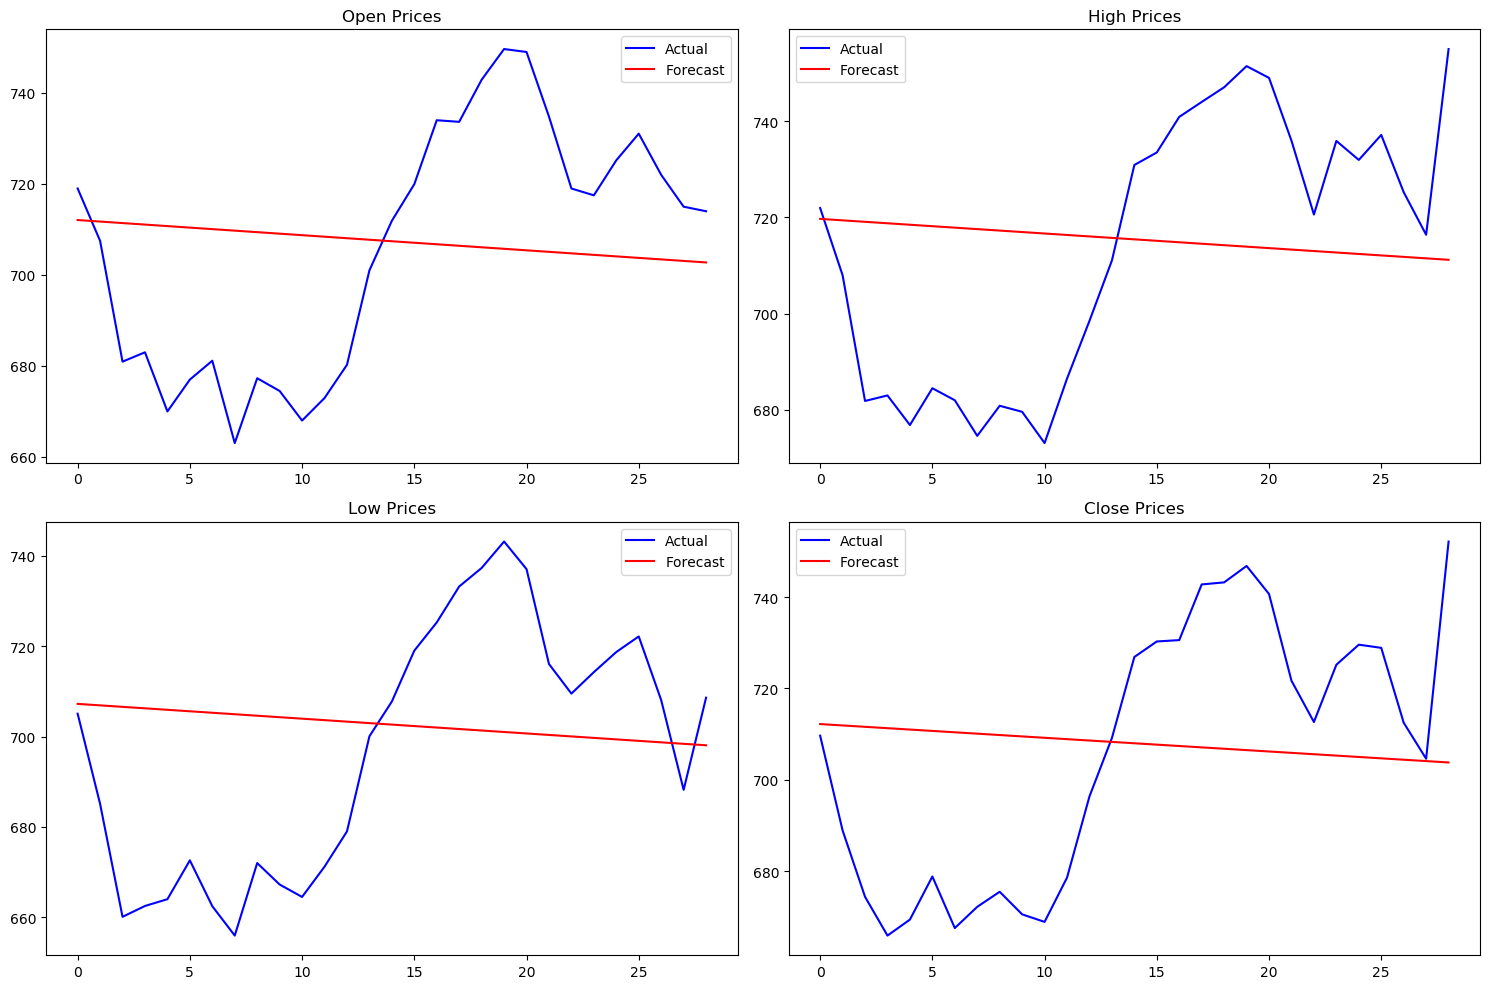

In [14]:
# Plotting results
plt.figure(figsize=(15, 10))
for i, column in enumerate(["Open", "High", "Low", "Close"], 1):
    plt.subplot(2, 2, i)
    plt.plot(test_data_inv[column], label='Actual', color='blue')
    plt.plot(forecast_df_inv[column], label='Forecast', color='red')
    plt.title(f'{column} Prices')
    plt.legend()

plt.tight_layout()
plt.show()